In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def analyze_video(path):
    cap = cv2.VideoCapture(path)
    # Check if camera opened successfully
    if (cap.isOpened()== False): 
        print("Error opening video stream or file")

    timestamp = 0
    mean_intensity = []
    # Read until video is completed
    while(cap.isOpened()):
        # Capture frame-by-frame
        ret, frame = cap.read()
        if ret == True:
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            mean_intensity.append(cv2.mean(gray)[0]) # grayscale is one dimensional so take the first element
            # Display the resulting frame
            # cv2.imshow('Frame',frame)

            # Press Q on keyboard to  exit
            # if cv2.waitKey(25) & 0xFF == ord('q'):
            #   break
            timestamp = timestamp + 1
        # Break the loop
        else: 
            break
    metadata = {
        'frame_count': cap.get(cv2.CAP_PROP_FRAME_COUNT),
        'fps': cap.get(cv2.CAP_PROP_FPS),
        'frame_width': cap.get(cv2.CAP_PROP_FRAME_WIDTH),   # float `width`
        'frame_height': cap.get(cv2.CAP_PROP_FRAME_HEIGHT)  # float `height`
    }
    # When everything done, release the video capture object
    cap.release()

    # Closes all the frames
    cv2.destroyAllWindows()

    return [range(1, timestamp+1), mean_intensity, metadata]

def show(x, y, xlabel, ylabel, start=None, end=None):
    fig, ax = plt.subplots()
    ax.plot(x[start:end], y[start:end])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

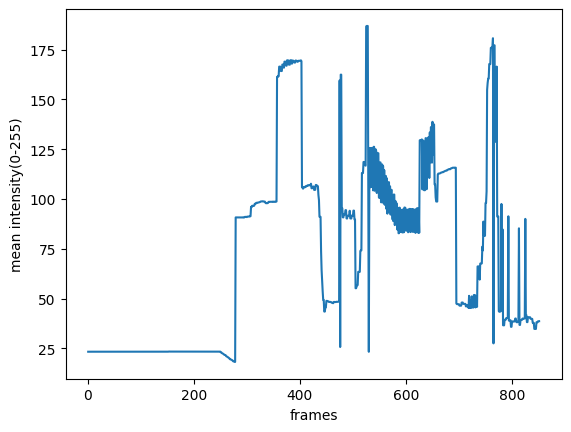

In [3]:
# plot mean gray intensity to frames
x, y, metadata = analyze_video('../videos/bw/pokemon_deleted_scene_bw.mp4')
show(x, y, 'frames', 'mean intensity(0-255)')

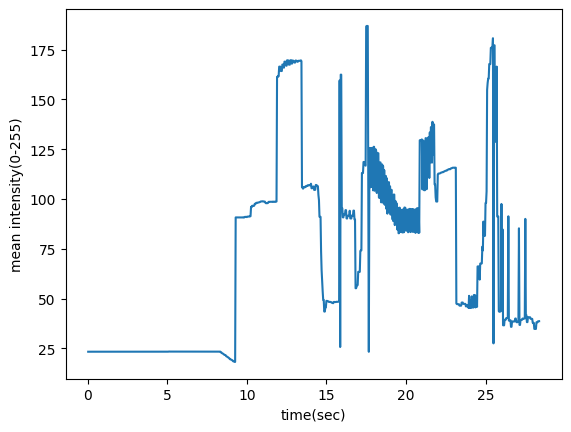

In [9]:
x_arr = np.array(x)
time = x_arr / metadata['fps']
show(time, y, 'time(sec)', 'mean intensity(0-255)')

In [12]:
diff = []
sd = np.std(y)
for i in range(len(y)-1):
    diff.append(1 if abs(y[i] - y[i+1]) > 30 else 0) # TODO: figure out tuning metrics
diff.append(0) # adjust shape for plotting


In [20]:
def detectUnsafeFlashesFrame(intensity, fps, max_flashes=3):
    warning_count = 0
    count = 0
    ## added count to show all flashes within the video in a 5 frame range
    for i in range(len(intensity) - fps):
        num_flash = np.sum(intensity[i:i+fps])
        if(num_flash > max_flashes and count == 0):
            print(f"{num_flash} flashes detected at frame: {i}")
            warning_count = warning_count + 1                
        count = count + 1
        if(count >= 5) : count = 0        
    return warning_count, i

detectUnsafeFlashesFrame(diff, int(metadata['fps']), max_flashes=5)

6 flashes detected at frame: 500
7 flashes detected at frame: 745
9 flashes detected at frame: 750
10 flashes detected at frame: 755
10 flashes detected at frame: 760
10 flashes detected at frame: 765
8 flashes detected at frame: 770
6 flashes detected at frame: 775


(8, 820)

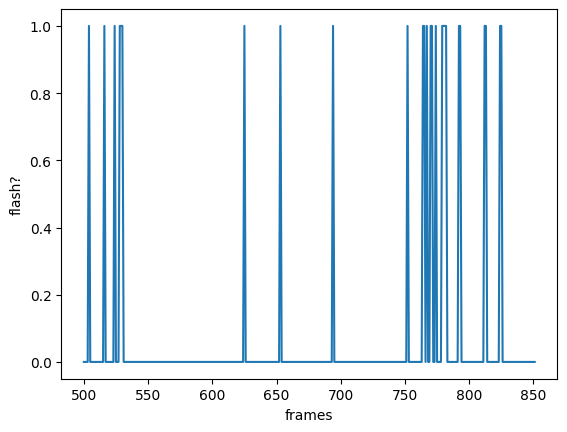

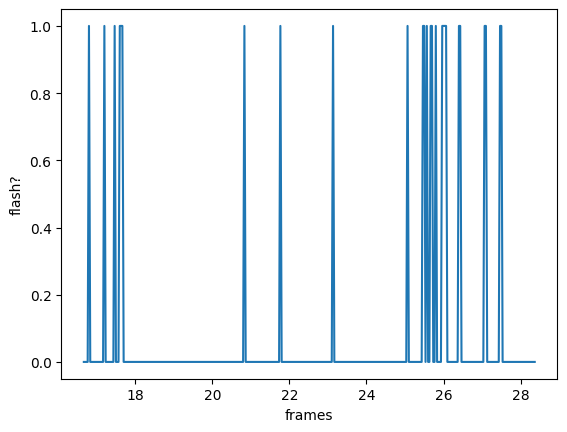

In [24]:
def detectUnsafeFlashesGraph(intensity, fps, max_flashes=3):
    warning_count = 0
    for i in range(len(intensity) - fps):
        num_flash = np.sum(intensity[i:i+fps])
        if(num_flash > max_flashes):
            warning_count = warning_count + 1
            break
    return warning_count, i

# get the starting frame of the 'unsafe' content
warning_count, starting_frame = detectUnsafeFlashesGraph(diff, int(metadata['fps']), max_flashes=4)
show(x, diff, 'frames', 'flash?', starting_frame)
show(time, diff, 'frames', 'flash?', starting_frame)